Reference:
1. https://github.com/Nguyen-Hoa/Activation-Maximization

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch
import torchvision
from torchvision import transforms
from PytorchRevelio import PytorchRevelio
# from utilities_PytorchRevelio import imagenet_labels
# from ShapeData import train_loader, valid_loader

In [2]:
# to load the model from parent directory
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('../neural networks/Shapes'))))

In [3]:
'''
model = models.resnet18(pretrained=True)
print(model)
'''
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(".."))))
# importing
from CNNmodel import ConvNet

# load model
model = ConvNet()
model.load_state_dict(torch.load("..\\model.pth"))

<All keys matched successfully>

In [4]:
for param in model.parameters():
    param.requires_grad_(False)

In [5]:
print(model)

ConvNet(
  (conv1): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (conv3): Conv2d(20, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (fc): Linear(in_features=320000, out_features=2, bias=True)
)


In [9]:
# choose GPU if it is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Device: {}'.format(device))

# put network on device
model.to(device)

Device: cpu


ConvNet(
  (conv1): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (conv3): Conv2d(20, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (fc): Linear(in_features=320000, out_features=2, bias=True)
)

In [10]:
# network transformer for input image
'''
img_transformer = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
'''

img_transformer = transforms.Compose([
    transforms.Resize((200,200)),
    transforms.ToTensor(),
    transforms.Normalize(mean=0., std=1.),
    transforms.Grayscale()
])

C:\Users\sashe\anaconda3\lib\site-packages\torch\nn\modules\module.py:1344: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


Processing of layer conv1, filter/neuron 6 is done.
Processing of layer conv1, filter/neuron 1 is done.
Processing of layer conv1, filter/neuron 5 is done.
Processing of layer conv1, filter/neuron 5 is done.
Processing of layer conv1, filter/neuron 9 is done.
Processing of layer conv1, filter/neuron 3 is done.
Processing of layer conv1, filter/neuron 6 is done.
Processing of layer conv1, filter/neuron 1 is done.
Processing of layer conv2, filter/neuron 18 is done.
Processing of layer conv2, filter/neuron 17 is done.
Processing of layer conv2, filter/neuron 4 is done.
Processing of layer conv2, filter/neuron 9 is done.
Processing of layer conv2, filter/neuron 0 is done.
Processing of layer conv2, filter/neuron 19 is done.
Processing of layer conv2, filter/neuron 1 is done.
Processing of layer conv2, filter/neuron 6 is done.
Processing of layer conv3, filter/neuron 23 is done.
Processing of layer conv3, filter/neuron 6 is done.
Processing of layer conv3, filter/neuron 21 is done.
Process

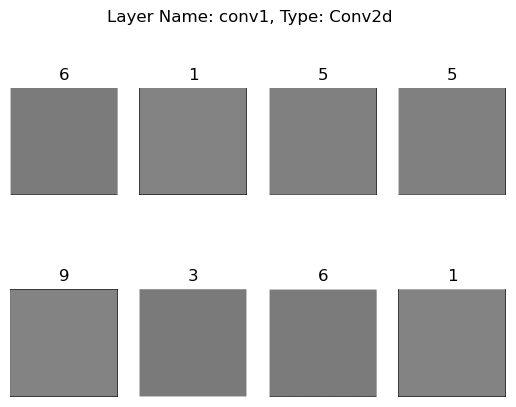

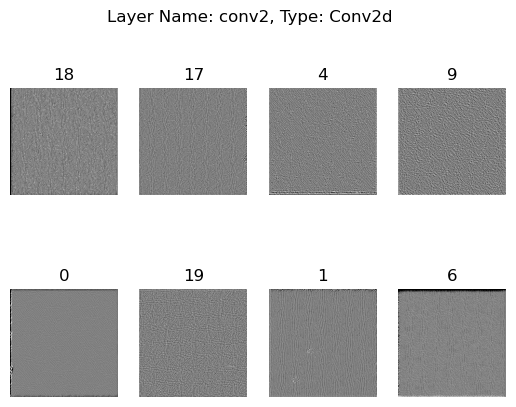

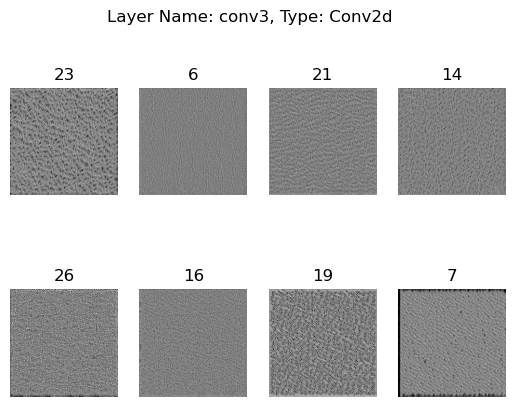

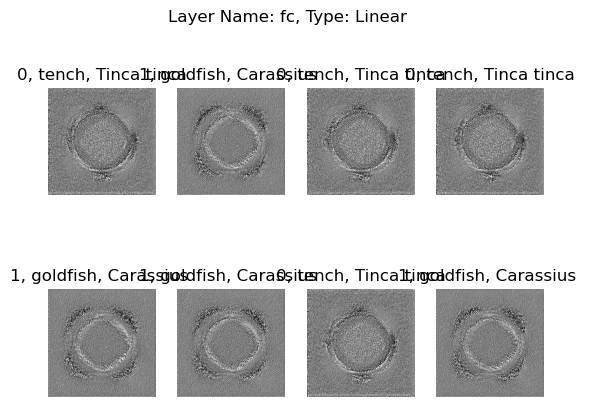

In [7]:
# for different convolutional filter and neuron in fully connected layer
# show representation
first_layer_name = 'conv1'
last_layer_name = 'fc'
for layer_name in model.named_modules():

    layer_name = layer_name[0]

    # select convolutional and fully connected layers for visualization
    layer = PytorchRevelio.return_module_by_name(network=model, module_name=layer_name)

    if isinstance(layer, nn.Conv2d):
        filter_neuron_num = layer.out_channels
        layer_type = 'Conv2d'
        num_iter = 150
        lr = 1
    elif isinstance(layer, nn.Linear):
        filter_neuron_num = layer.out_features
        layer_type = 'Linear'
        num_iter = 500
        lr = 1
    else:
        continue

    # from each layer select 8 filter our neurons
    filters_neuron_indexs = np.random.choice([i for i in range(filter_neuron_num)], size=8)

    # for each selected filter or neuron, calculate representation
    plt.figure()
    for i, filter_neuron_index in enumerate(filters_neuron_indexs):
        img = PytorchRevelio.activation_maximization(network=model, img_transformer=img_transformer,
                                                     in_img_size=(200, 200, 1),
                                                     first_layer_name=first_layer_name, layer_name=layer_name,
                                                     filter_or_neuron_index=filter_neuron_index, num_iter=num_iter,
                                                     lr=lr, device=device)

        # to cpu and normalize for illustration purpose
        img = PytorchRevelio.tensor_outputs_to_image(img)

        # Illustrate
        ax = plt.subplot(2, 4, i+1)
        plt.imshow(img)
        if layer_name != last_layer_name:
            ax.set_title("{}".format(filter_neuron_index))
        else:
            # TODO: edit this to the class names of the output layer (square and non-square)
            ax.set_title("{}, {}".format(filter_neuron_index, imagenet_labels(class_number=filter_neuron_index)))

        plt.suptitle('Layer Name: {}, Type: {}'.format(layer_name, layer_type))
        ax.axis('off')
        print('Processing of layer {}, filter/neuron {} is done.'.format(layer_name, filter_neuron_index))

plt.savefig('experiment1.png')